# SECTION THREE - Input masking (30%)

When a trained CNN classifies an image of some object, can we determine whether it is actually focussing on
the image regions containing that object, as opposed to contextual cues surrounding the object? One simple
approach is to systematically occlude portions of a correctly classified image, and noting how the output
probability of the correct class changes. The result is a “saliency map” of the image, that we can visualise
for an indication of what the CNN might be focussing on. This idea has been used by Zeiler and Fergus
(2013); see section 4.2 and figure 7d of their paper available here: https://arxiv.org/abs/1311.2901.
Load any network with weights pre-trained on ImageNet into your coding environment, and then generate
saliency maps for a handful of test images by sliding an occluded square over the image and recording the
network’s output probability of the correct class at each square’s centre (similar to the results shown in
figure 7d of the paper).

## load mobilenet model to use it for predicting class labels

In [ ]:
from torchvision import models
from PIL import Image

mobilenet = models.mobilenet_v2(pretrained=True)
mobilenet.eval()
mobilenet.to(device)


## comment

I chose a picture with high confidence in prediction, to see the effect of the mask on th produce probablility

Frensh horn, target class no : 566 


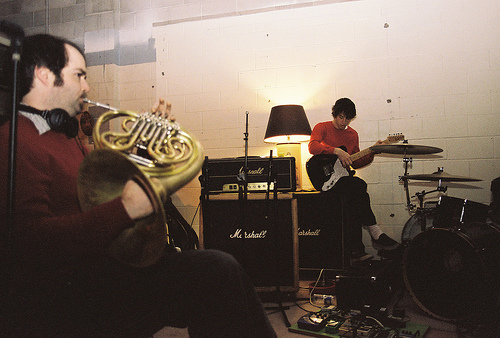

In [ ]:
trans = transforms.Compose([ transforms.Resize((224, 224)),
        transforms.ToTensor(),

        ])

norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# picture of sturgeon, true class is 394
img_path2 = '/content/n02640242_sturgeon.JPEG'
img_path = '/content/n03394916_French_horn.JPEG'
img = Image.open(img_path)
print("Frensh horn, target class no : 566 ")
img

## Comment

Here, I created functions that take the jpeg image and produce images with the mask, anf the last function gets the top 5 predictions from the models on each of the masked images

source of the picture : https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n03394916_French_horn.JPEG

In [ ]:

# function to apply the mask to an image
def apply_mask(img, width , height ,mask_size):
  img_tensor = trans(img).unsqueeze(0).to(device)
  image_copy = img_tensor.clone()
  # zero out aoo the point  'mask size steps along both width and heght axes'
  image_copy[:, : , width: width+mask_size , height : height+mask_size ] = 0
  return image_copy

#  function to generate the masked images
def generate_images(img ,mask_size,stride):
  #  list to store bunch of masked pics
  masked_images = []
  # loop through each image to create masked copies to feed it to the model
  for height in range(0,224 , stride):
    for width in range(0,224, stride):
      image = apply_mask(img, width , height ,mask_size)
      masked_images.append(image)
  return masked_images

# produce the top 5 prediction of the model
def get_predictions(masked_images):
  for i,img_tensor in enumerate(masked_images):
    #  pass the picture to the model
    img = norm(img_tensor)
    prediction = mobilenet(img)
    #  turn that to probability
    probabilities = F.softmax(prediction[0], dim=0).sort(descending = True)
    # predicted_class = probabilities.max(0)
    imshow(img_tensor.cpu()[0])
    print(f"Predicted classes are {probabilities[1][:4]}")
    print(f"Predicted classes are {probabilities[0][:4]}")


## Generating predictions from the model

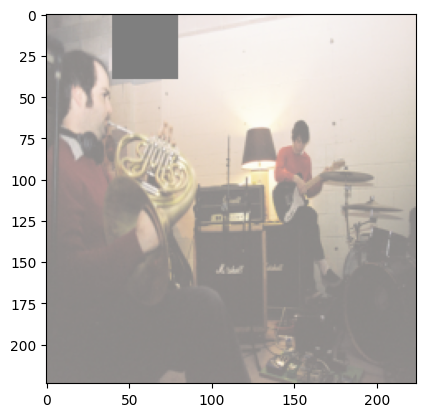

Predicted classes are tensor([566, 513, 875, 776])
Predicted classes are tensor([0.9055, 0.0570, 0.0277, 0.0067], grad_fn=<SliceBackward0>)


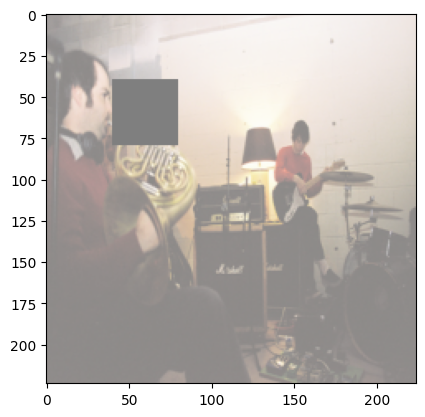

Predicted classes are tensor([566, 875, 513, 776])
Predicted classes are tensor([0.6789, 0.1562, 0.0987, 0.0228], grad_fn=<SliceBackward0>)


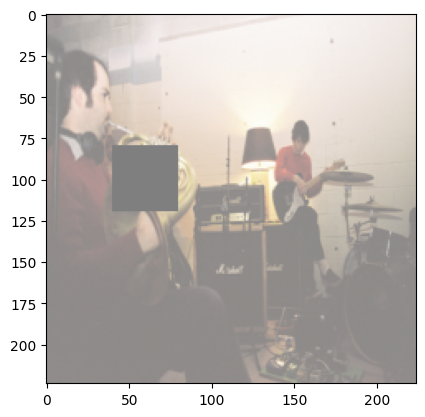

Predicted classes are tensor([683, 432, 486, 875])
Predicted classes are tensor([0.2012, 0.1811, 0.0801, 0.0749], grad_fn=<SliceBackward0>)


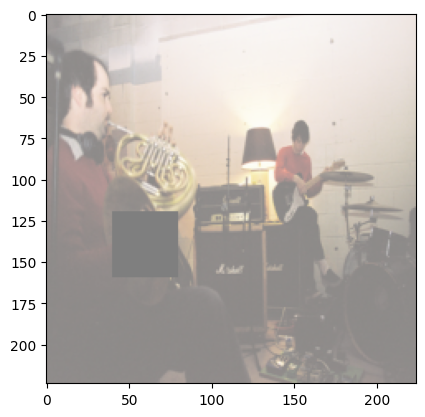

Predicted classes are tensor([566, 513, 875, 776])
Predicted classes are tensor([0.8549, 0.0785, 0.0329, 0.0141], grad_fn=<SliceBackward0>)


In [ ]:
image_list = generate_images(img ,mask_size = 40, stride =40)
get_predictions(masked_images = image_list[6:10]) # select the intresting pictures only

### Comment


The model predicts the class well unless the mask is exactly on the frensh horn, and you can see in the above images the correlation between the models confidence in predicting the class and the position of the mask

## Sailncy Map

In [ ]:
#  generate a list for the probability of each image with the mask
def get_saliency_map(masked_images):
  saliency_map = []
  for i,img_tensor in enumerate(masked_images):
    #  pass the picture to the model
    img = norm(img_tensor)
    prediction = mobilenet(img)

    #  turn that to probability
    probabilities = F.softmax(prediction[0], dim=0)
    cls = probabilities.max(0)
    #  add the probability of the top class
    saliency_map.append(cls[0].item())
  return saliency_map



In [ ]:
stride =20
mask_size = 30
#  generate images
image_list = generate_images(img ,mask_size = mask_size, stride =stride)
# create a sailancy map
saliency_map = get_saliency_map(image_list)

In [ ]:
len(saliency_map)

144

In [ ]:
# reshape the list
saliency = np.array(saliency_map).reshape((12, 12))

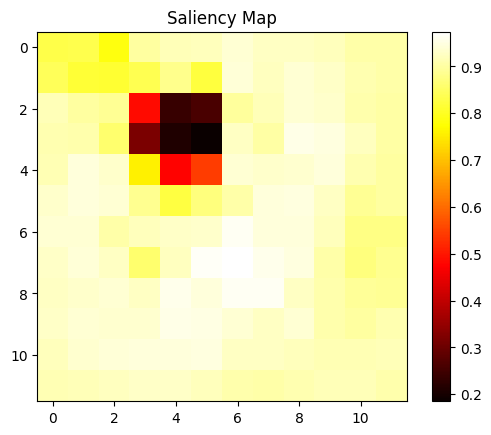

In [ ]:
#  using matplotlib to generate the map

plt.imshow(saliency, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Saliency Map")
plt.show()

## Comment

As we can see the lowest pssible probabilities are when the mask is exactly on the horn

<font size = 6 color = red > Good </font>